In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

print(df.head())
print(df.info())
print(df.describe())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [5]:
# Encoding:

df['test preparation course'] = df['test preparation course'].map({
    'completed': 1,
    'none': 0
})

df['gender'] = df['gender'].map({
    'male': 0,
    'female': 1
})

# Encode 'parental level of education'
df['parental level of education'] = df['parental level of education'].astype('category').cat.codes

print(df.head())


   gender race/ethnicity  parental level of education         lunch  \
0       1        group B                            1      standard   
1       1        group C                            4      standard   
2       1        group B                            3      standard   
3       0        group A                            0  free/reduced   
4       0        group C                            4      standard   

   test preparation course  math score  reading score  writing score  
0                        0          72             72             74  
1                        1          69             90             88  
2                        0          90             95             93  
3                        0          47             57             44  
4                        0          76             78             75  


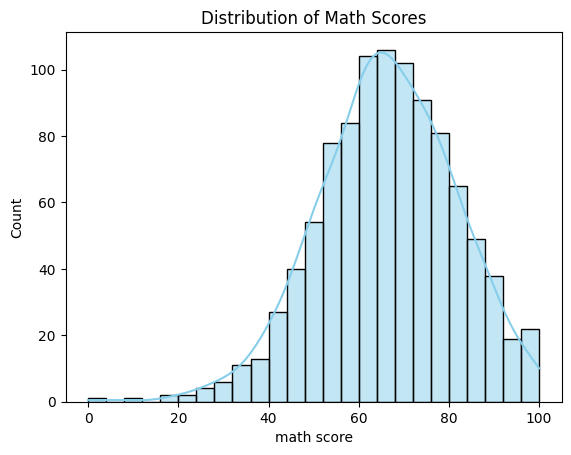

In [6]:
# Visualizations:

sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.show()


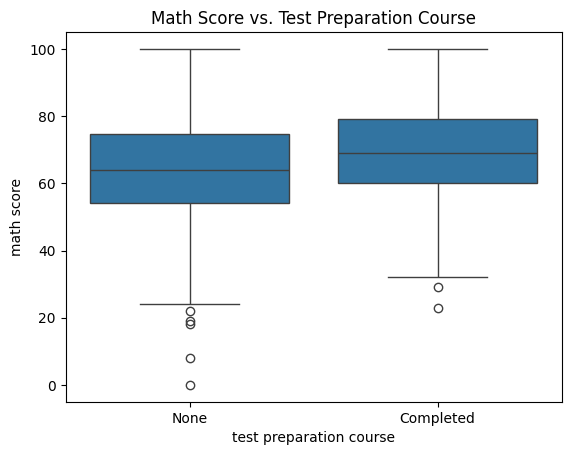

In [7]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.xticks([0, 1], ['None', 'Completed'])
plt.title('Math Score vs. Test Preparation Course')
plt.show()


In [8]:
# Hypothesis Testing: 
# To Test whether there is significant difference in math scores between males and females

from scipy.stats import ttest_ind

male_scores = df[df['gender']==0]['math score']
female_scores = df[df['gender']==1]['math score']

t_stat, p_val = ttest_ind(male_scores, female_scores)
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: 5.383245869828983
p-value: 9.120185549328822e-08


In [9]:
# Hypothesis 2: Completing the test preparation course improves math scores.

completed = df[df['test preparation course']== 1]['math score']
none = df[df['test preparation course']== 0]['math score']

t_stat, p_val = ttest_ind(completed, none)
print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 5.704616417349102
p-value: 1.5359134607147415e-08


In [10]:
X = df[[
    'reading score',
    'writing score',
    'test preparation course',
    'gender',
    'parental level of education'
]]

y = df['math score']



In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
coefficients = pd.Series(lr.coef_, index=X.columns)

print("\nRegression Coefficients:\n", coefficients)

print("Intercept:", lr.intercept_)



Regression Coefficients:
 reading score                   0.271431
writing score                   0.727941
test preparation course        -3.441632
gender                        -13.525957
parental level of education     0.184622
dtype: float64
Intercept: 5.648874423918521


In [23]:
y_pred = lr.predict(X_test)

# RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("RMSE:", rmse)

print("R²:", r2)



Model Performance:
RMSE: 5.558825614455511
R²: 0.8730141144516168


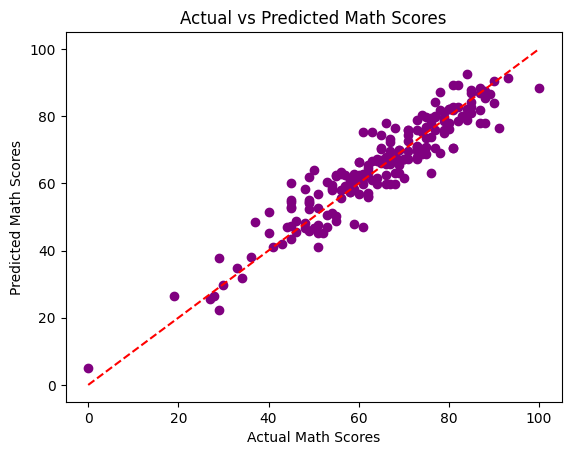

In [24]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.show()


In [25]:
residuals = y_test - y_pred
residuals



521    14.386954
737    -7.473931
740     1.940273
660    -6.427258
411     1.746082
         ...    
408     6.713195
332     6.011737
208     3.829151
613    -1.890754
78     -1.102058
Name: math score, Length: 200, dtype: float64

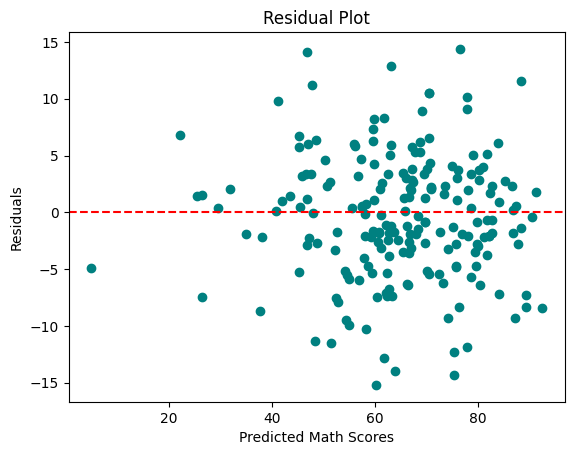

In [26]:
plt.scatter(y_pred, residuals, color='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Math Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


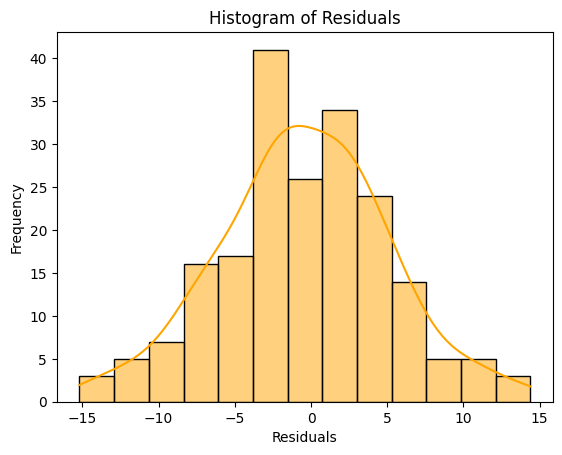

In [27]:
sns.histplot(residuals, kde=True, color='orange')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Interpretation
# “The histogram of residuals shows a roughly bell-shaped curve centered around zero, indicating that prediction errors are generally small and evenly distributed. 
# This supports the use of a linear regression model and suggests  model’s predictions are reasonably accurate.”

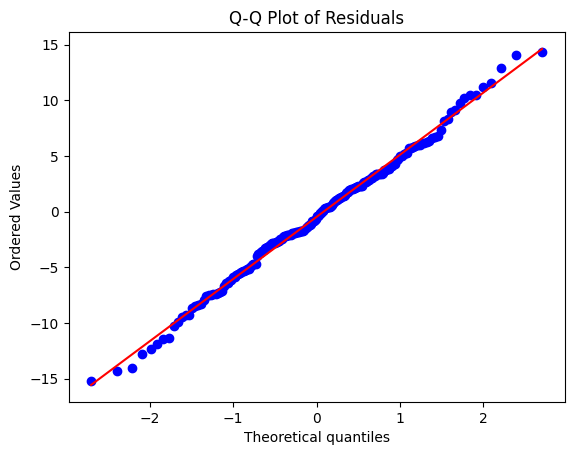

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [29]:
# Interpretation of Q-Q Plot
# “The Q-Q plot shows that residuals closely follow a normal distribution, with minor deviations at the tails. 
# This supports the suitability of a linear regression model and indicates that residual errors are generally well-behaved.”

In [30]:
print("\nAverage Math Score by Test Preparation Status:")
print(df.groupby('test preparation course')['math score'].mean())

print("\nAverage Math Score by Gender:")
print(df.groupby('gender')['math score'].mean())



Average Math Score by Test Preparation Status:
test preparation course
0    64.077882
1    69.695531
Name: math score, dtype: float64

Average Math Score by Gender:
gender
0    68.728216
1    63.633205
Name: math score, dtype: float64


In [31]:
# Print the mapping for parental education
print(df['parental level of education'].astype('category').cat.categories)
print('parental level of education')

Index([0, 1, 2, 3, 4, 5], dtype='int8')
parental level of education


In [40]:
# Creating a new data row for prediction

new_data = pd.DataFrame({
    'reading score': [90],
    'writing score': [68],
    'test preparation course': [1],
    'gender': [1],
    'parental level of education': [4]
})

# Predict math score
predicted_score = lr.predict(new_data)
print("Predicted Math Score:", predicted_score[0])


Predicted Math Score: 63.34856279744374


In [33]:
# Save trained model to a .pkl file
import joblib

joblib.dump(lr, "math_score_model.pkl")


['math_score_model.pkl']